## Homework3

下記の「#common」で始まるセルの中で指定されたリンク先にある購買データをベースに以下の処理を実行し、問いに答えて課題を提出してください。（データの前処理は、以下の記載の通りに行ってください。）なお、提出するコードの部分は2~6の内容になります。
    
処理内容

1. `#common`のセルで事前に前処理されたデータ`target_online_retail_data_tb`を用います。
2. 購買者（`CustomerID`）ごとの合計購買金額（`TotalPrice`の合計）を算出します。
3. 購買者ごとの合計購買金額をベースに、降順に並び替えをします。  
4. 並び替えた順のままで、購買者を$n$等分（$n$はデータ数を越えず、分位数に同一の値が存在しない自然数。購買者数が$n$で割り切れるとは限らず、この場合の処理は`Pandas.qcut`の処理に準じます。）にグループ分けします。
5. それぞれのグループの合計購買金額が売上の何割を占めるかを求めてください。（このアプローチをデシル分析といいます）。
6. さらに、全体の売上に対するグループの合計購買金額の割合が大きいグループから順に「グループ1」「グループ2」$\cdots$「グループn」と降順に並び替え、`Pandas.Series`形式で回答してください。


(なお、マーケティング戦略では、このように顧客を分けることをセグメンテーションといい、上位2割に絞ってアプローチを仕掛けることをターゲティングといいます。それぞれの戦略によりますが、優良顧客に的を絞った方が投資対効果が高いことが多いため、このようなアプローチを取ることがあります。これに関連して、上位2割の顧客が売上全体の8割を占めることを「パレートの法則」と言います。)

提出するときは、以下の点に注意してください。  
>- 以下の関数`homework`の`!!WRITE ME!!`に処理を書いてください。(**「`!!WRITE ME!!`」は消して、記入してください。**)
>- 実際の提出は記述された`homework`関数全てになり、**提出はOmnicampus内の宿題の欄から今週の課題を選択後、提出内容に関数を貼り付けてから[Pythonコード提出]を押してください。**
>- 前処理は以下のコードを使ってください。  
>- 返り値が`Pandas.Series`形式になるようにしてください。  
>- 解答は、`my_result=pd.Series([0.6,0.2,0.1,0.025,0.025,0.022,0.021,0.02,0.01,0]) `のような形になります。(売上割合はグループ順にして、合計は1になるようにします。)

以下は共通の前処理になります。Week4のドライブにあるデータ（Online Retail.xlsx）を各自で用いてデータを読み込む形式にしています。

以下の説明などを参考にして各自の環境で適宜変更してください。

次のコードセルでGoogle Driveをマウントした後、ご自身の環境に合わせて、file_urlを変更します。Colabの左サイドバーで見ることができます

1.   最初のセルを実行した後、Colabのファイルブラウザをたどって、対象ファイルのところで右クリック「パスをコピー」を実行
2.   次のセルのfile_url = "  " にコピーされたパスをペースト

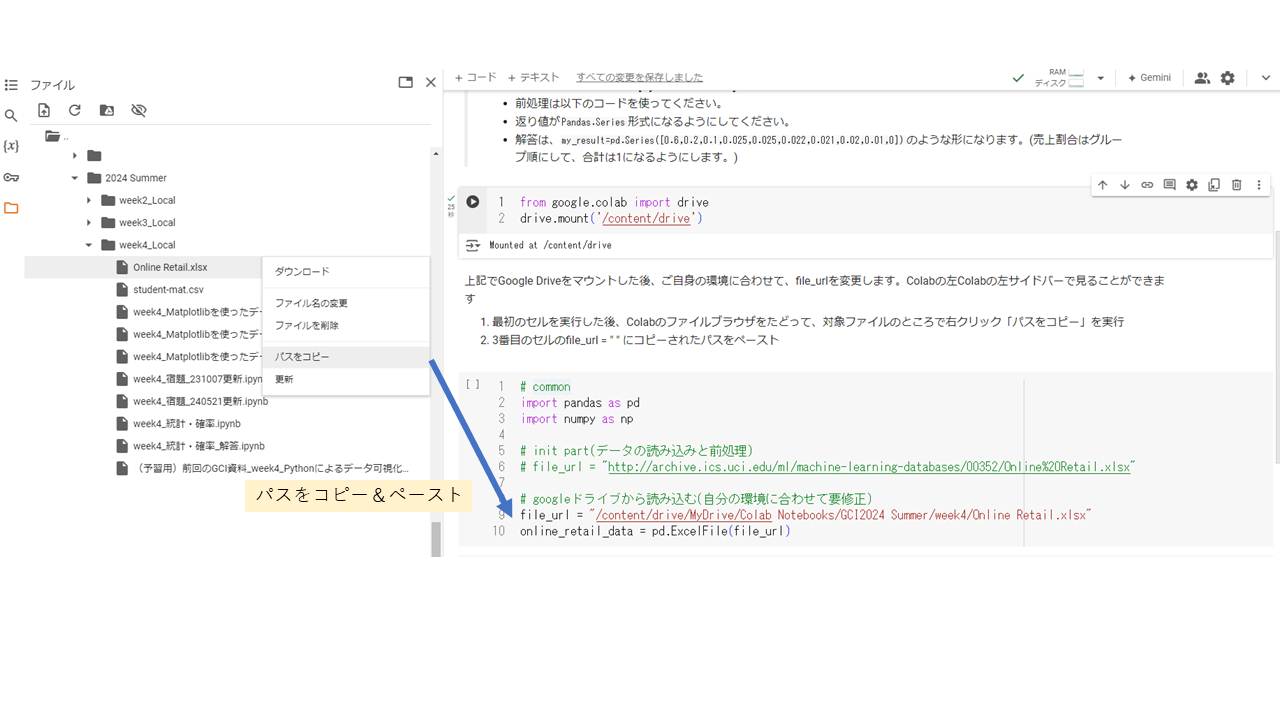

上の説明ではデータを各自でダウンロードし、各自のMy Driveのディレクトリに格納する形を取っています。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# common
import pandas as pd
import numpy as np

# init part(データの読み込みと前処理)
# file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# googleドライブから読み込む(自分の環境に合わせて要修正)
file_url = "/content/drive/MyDrive/Colab Notebooks/GCI2024 Summer/week4/Online Retail.xlsx"
online_retail_data = pd.ExcelFile(file_url)

In [ ]:
# common
online_retail_data_table = online_retail_data.parse('Online Retail')

# 採点の都合上、文字列型に変換
online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])

# InvoiceNoの先頭が5であるものとIDがNullでないものが対象
target_online_retail_data_tb = online_retail_data_table[(online_retail_data_table.cancel_flg == '5')
                                                        & (online_retail_data_table.CustomerID.notnull())]

target_online_retail_data_tb = target_online_retail_data_tb.assign(TotalPrice=target_online_retail_data_tb.Quantity * target_online_retail_data_tb.UnitPrice)

次の関数部分を作成してOmnicampusに提出してください。

In [ ]:
# Omnicampusに提出するのはこのセルのみ
def homework(target_online_retail_data_tb, n):
    !!WRITE ME!!
    return my_result

できた関数を用いてパレート図を描いてみましょう。

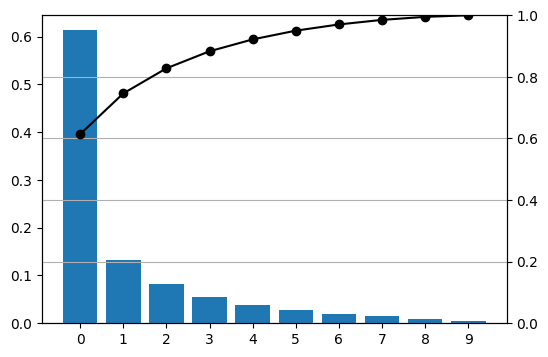

In [ ]:
# Matplotlibで可視化してみる

import matplotlib.pyplot as plt

N = 10
data = homework(target_online_retail_data_tb, N)

fig, ax1 = plt.subplots(figsize=(6,4))

# セグメント数で横軸を決める
data_num = len(data)

# 累積和
cum_per = np.cumsum(data)

# 棒グラフ
ax1.bar(range(data_num), data)
ax1.set_xticks(range(data_num))

# 折れ線グラフ
ax2 = ax1.twinx()
ax2.plot(range(data_num), cum_per, c="k", marker="o")
ax2.set_ylim([0, 1])
ax2.grid(True, which='both', axis='y')

**謝辞**：以下のデータセットの利用に関して  
 https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

引用元：Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [[http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)]. Irvine, CA: University of California, School of Information and Computer Science.

Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).